## 定期預金の契約についてのデータセット

データの取得
- https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip<br>
bank.csv を使用

データの説明
- https://archive.ics.uci.edu/ml/datasets/bank+marketing

内容を確認
- "age";"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"<br>
30;"unemployed";"married";"primary";"no";1787;"no";"no";"cellular";19;"oct";79;1;-1;0;"unknown";"no"
- "y" 定期預金を預けてくれたかどうか

In [42]:
import pandas as pd
import numpy as np

bank = pd.read_csv('data/bank.csv', sep=';')

# 使用する列のみからなる DataFrame を作成
bank = bank[['y', 'job', 'campaign']]

# 'y'列のダミー変数化: yes->1, no->0
bank['y'] = bank['y'].map(lambda x: 1 if x == 'yes' else 0)

# 列ごとの欠損値の数
bank.isna().sum()

y           0
job         0
campaign    0
dtype: int64

In [43]:
bank.head(2)

,y,job,campaign
0,0,unemployed,1
1,0,services,1


- y: 定期預金を契約したか（目的変数）
- job: 職種
- campaign: 勧誘のコンタクト回数

In [44]:
import seaborn as sns
from matplotlib import pyplot as plt
bank['employed'] = bank['job'].map(lambda x: 0 if
                              x == 'retired' or
                              x == 'student' or
                              x == 'unemployed' or
                              x == 'unknown'
                              else 1)
bank = bank[['y', 'campaign', 'employed']]      

<AxesSubplot:xlabel='campaign', ylabel='employed'>

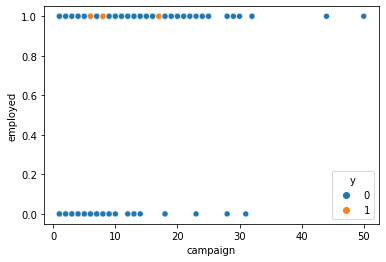

In [45]:
sns.scatterplot(x=bank.campaign, y=bank.employed, hue=bank.y)

In [46]:
bank.query("employed==1").size

12123

In [47]:
bank.size

13563

In [48]:
bank.query("employed==0").size

1440

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# 散布図にシグモイド曲線を重ねて表示
def sigmoid(x, b0, b1):
    return 1/(1 + np.exp(-(b0 + b1 * x)))

def Logistic_Model(X, Y):
    """
    ロジスティック回帰モデルを作成
    """
    model = LogisticRegression(C=10000.0)
    model.fit(X, Y)
    return model

def Logistic_Plot(model, X, Y):
    # 散布図
    sns.scatterplot(x=X.iloc[:,0], y=Y)

    # パラメータ
    b0 = model.intercept_[0]
    b1 = model.coef_[0][0]

    # y=0.5となる分割線
    boundary = -b0 / b1
    plt.plot([boundary, boundary], [0, 1], color='lightblue')

    # シグモイド曲線
    _max = X.iloc[:,0].max()
    _min = X.iloc[:,0].min()
    _step = (_max - _min) / 100
    _X = np.arange(_min, _max + _step, _step)
    plt.plot(_X, sigmoid(_X, b0, b1), color='brown')
    
    return boundary

def calc_AUC(model, X, Y):
    """
    AUCの算出
    """
    Y_proba = model.predict_proba(X)
    fpr, tpr, thresholds = roc_curve(Y, Y_proba[:, 1])
    return auc(fpr, tpr)

AUC=0.579
Boundary=-13


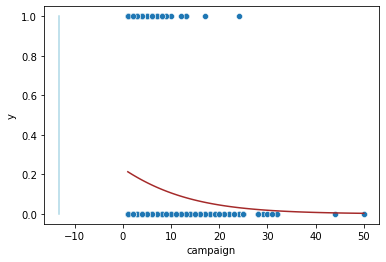

In [50]:
# 説明変数、目的変数を作成
X = bank[['campaign', 'employed']]
Y = bank.y

model = Logistic_Model(X, Y)
boundary = Logistic_Plot(model, X, Y)
print('AUC={:.3f}'.format(calc_AUC(model, X, Y)))
print('Boundary={:.0f}'.format(boundary))

AUC=0.541
Boundary=-2


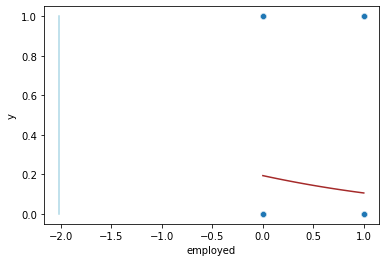

In [52]:
# 説明変数、目的変数を作成
X = bank[['employed']]
Y = bank.y

model = Logistic_Model(X, Y)
boundary = Logistic_Plot(model, X, Y)
print('AUC={:.3f}'.format(calc_AUC(model, X, Y)))
print('Boundary={:.0f}'.format(boundary))